 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [34]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [35]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [36]:
# Count nulls
# YOUR CODE HERE
print(whale_returns.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [37]:
# Drop nulls
# YOUR CODE HERE
whale_returns.dropna(inplace=True)
print(whale_returns.isnull().sum())

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [38]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date",  parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [39]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [40]:
# Drop nulls
# YOUR CODE HERE
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [69]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [70]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [71]:
# Fix Data Types
# YOUR CODE HERE
sp500_history["Close"] = sp500_history["Close"].str.replace('$','').astype("float")

In [72]:
sp500_history.dtypes

Close    float64
dtype: object

In [73]:
sp500_history.sort_index(inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [74]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_history.pct_change()

In [75]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [80]:
# Rename Column
# YOUR CODE HERE 
sp500_daily_returns.rename(columns = {"sp500": "S&P 500"}, inplace = True)
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [102]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

df_daily = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = "columns", join = "inner")
df_daily.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

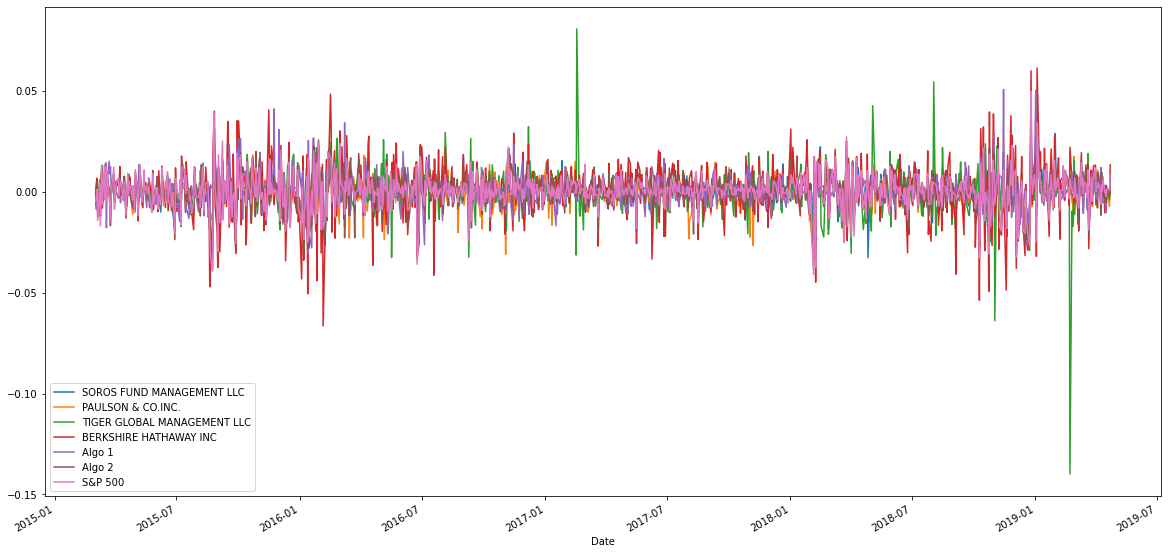

In [103]:
# Plot daily returns
# YOUR CODE HERE
df_daily.plot(figsize = (20,10))

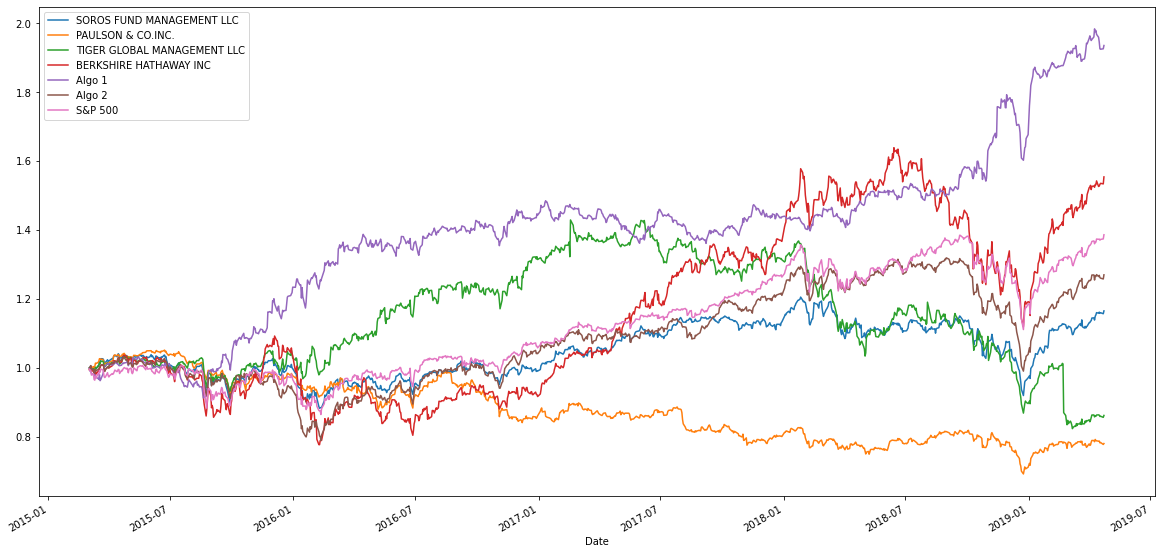

In [104]:
# Plot cumulative returns
# YOUR CODE HERE
df_cumulative = (1 + df_daily).cumprod()
df_cumulative.plot(figsize = (20,10))

Algo 1 and Berkshire returns outperform the S&P 500.

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

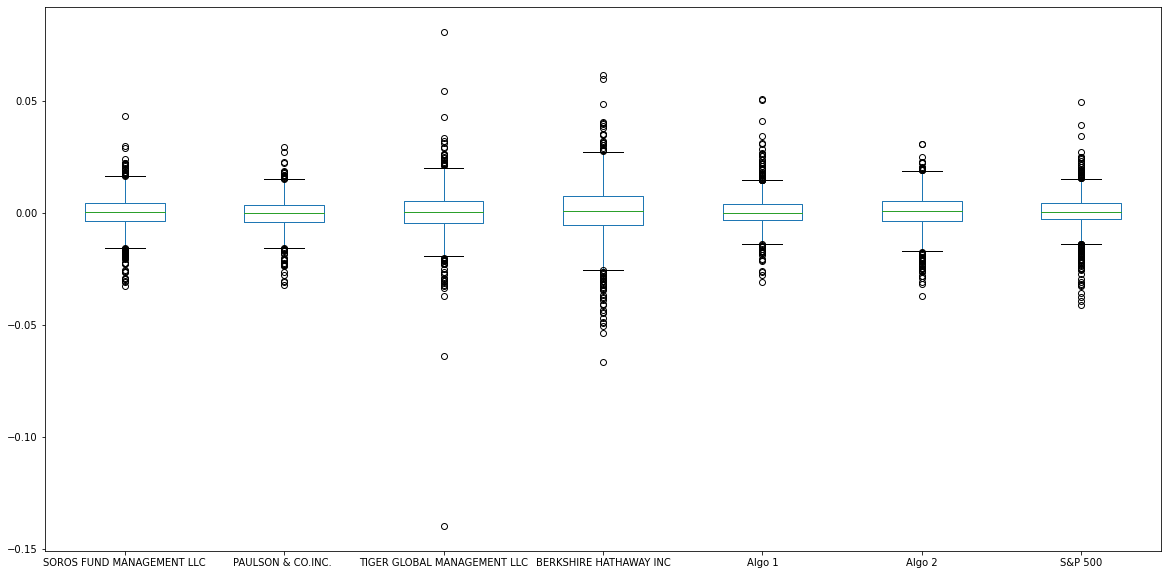

In [105]:
# Box plot to visually show risk
# YOUR CODE HERE
df_daily.plot(kind = "box", figsize = (20,10))

In [115]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


In [123]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["S&P 500", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


Tiger and Berkshire are more riskier than the S&P 500, because they have more volatility.

In [124]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
df_annual_std = df_daily_std*np.sqrt(252)
df_annual_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P 500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

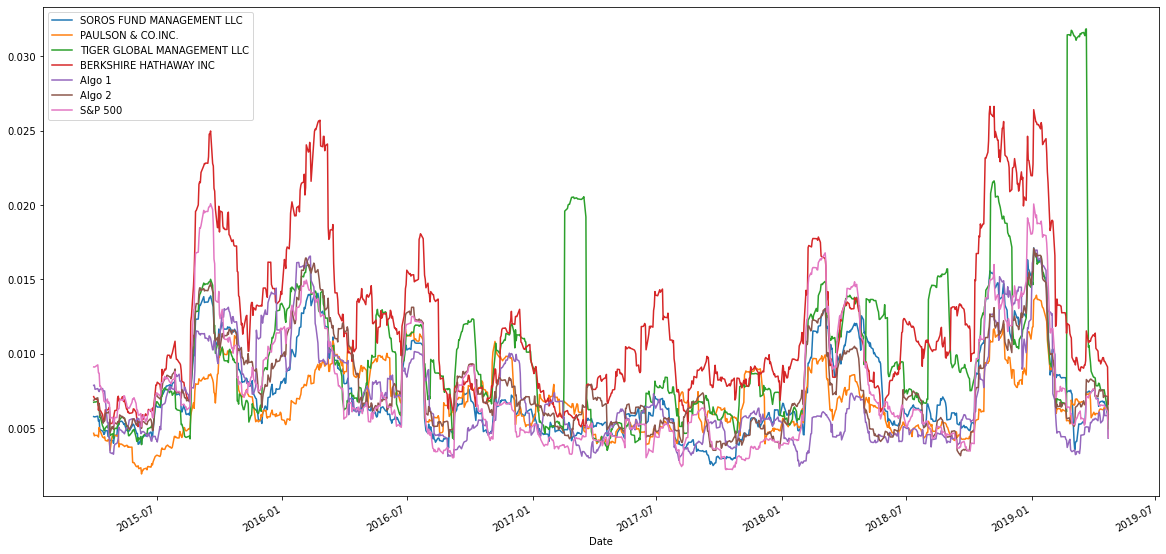

In [143]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
sp500_rolling_21 = df_daily.rolling(window = 21).std()
sp500_rolling_21.plot(figsize = (20,10))

As the S&P 500 risk increases, so do the other portfolios.

In [140]:
# Construct a correlation table
# YOUR CODE HERE
df_daily.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


Algo 2 and Soros closely mimic the S&P 500 with the closest correlation. 

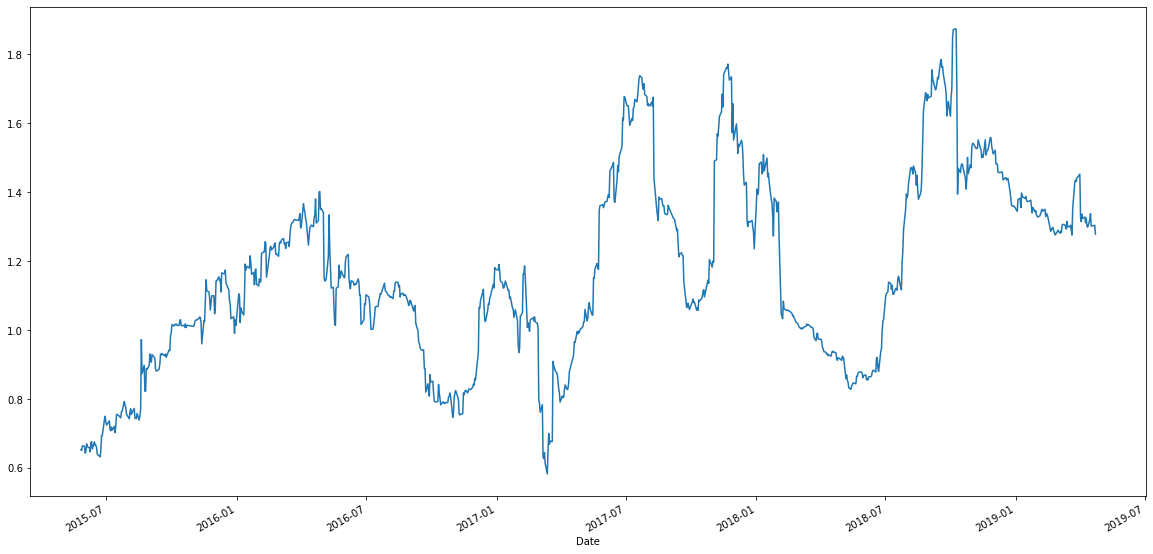

In [157]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
rolling_covar = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily["S&P 500"])
rolling_var = df_daily["S&P 500"].rolling(window=60).var()
rolling_beta = rolling_covar / rolling_var
rolling_beta.plot(figsize=(20,10))

In [158]:
rolling_beta.mean()

1.1590613643436432

Based off the chart and mean, Berkshire looks to be sensitive to the index.

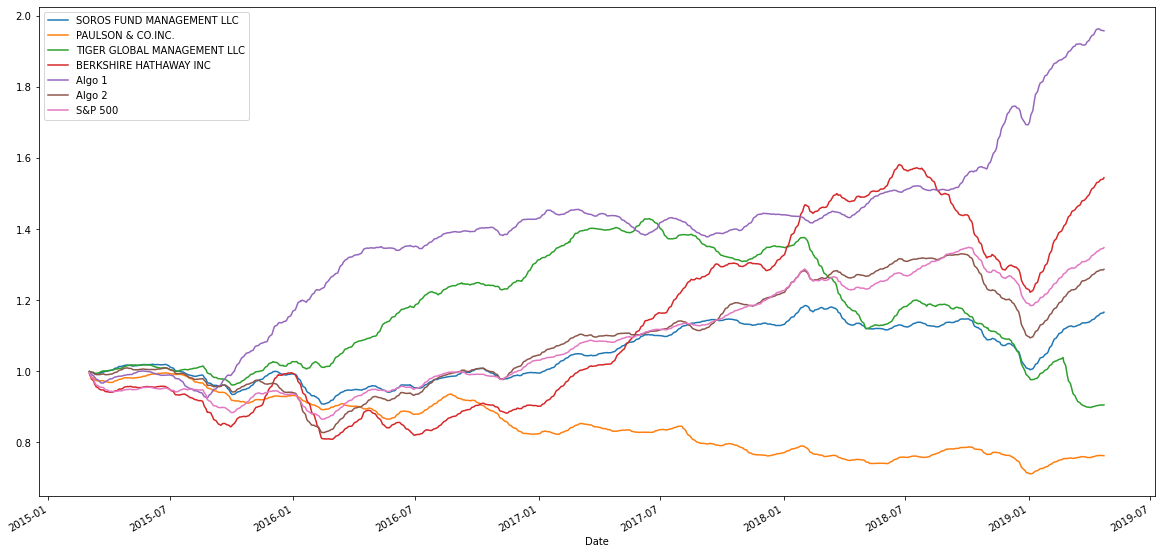

In [165]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
df_daily_ewma = df_daily.ewm(span = 21, adjust= False).mean()
(1+df_daily_ewma).cumprod().plot(figsize = (20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [170]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = sharpe_ratios = (df_daily.mean() * 252) / (df_daily.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

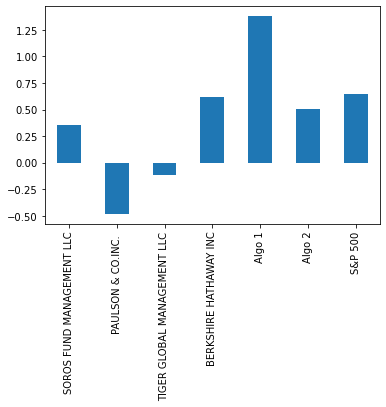

In [171]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind = "bar")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:
Algo 1 is the only one that outperforms them.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [498]:
# Read the first stock
# YOUR CODE HERE
dis_stock = pd.read_csv(Path("Resources/DIS_StockPrices.csv"), index_col="Date", parse_dates = True, infer_datetime_format=True)
dis_stock.rename(columns = {"Close":"DIS"}, inplace=True)
dis_stock.head()

,DIS
Date,
2012-10-01 16:00:00,52.07
2012-10-02 16:00:00,51.64
2012-10-03 16:00:00,52.47
2012-10-04 16:00:00,52.63
2012-10-05 16:00:00,52.97


In [499]:
# Read the second stock
# YOUR CODE HERE
amzn_stock = pd.read_csv(Path("Resources/AMZN_StockPrices.csv"), index_col="Date", parse_dates = True, infer_datetime_format=True)
amzn_stock.rename(columns = {"Close":"AMZN"}, inplace=True)
amzn_stock.head()

,AMZN
Date,
2012-10-01 16:00:00,252.01
2012-10-02 16:00:00,250.60
2012-10-03 16:00:00,255.92
2012-10-04 16:00:00,260.47
2012-10-05 16:00:00,258.51


In [500]:
# Read the third stock
# YOUR CODE HERE
sbux_stock = pd.read_csv(Path("Resources/SBUX_StockPrices.csv"), index_col="Date", parse_dates = True, infer_datetime_format=True)
sbux_stock.rename(columns = {"Close":"SBUX"}, inplace=True)
sbux_stock.head()

,SBUX
Date,
2012-10-01 16:00:00,25.07
2012-10-02 16:00:00,24.65
2012-10-03 16:00:00,24.75
2012-10-04 16:00:00,24.55
2012-10-05 16:00:00,24.37


In [501]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
custom_stocks = pd.concat((dis_stock, amzn_stock, sbux_stock), axis = "columns", join= "outer")
custom_stocks.head()

,DIS,AMZN,SBUX
Date,,,
2012-10-01 16:00:00,52.07,252.01,25.07
2012-10-02 16:00:00,51.64,250.60,24.65
2012-10-03 16:00:00,52.47,255.92,24.75
2012-10-04 16:00:00,52.63,260.47,24.55
2012-10-05 16:00:00,52.97,258.51,24.37


In [502]:
# Reset the index
# YOUR CODE HERE
custom_stocks.reset_index()

,Date,DIS,AMZN,SBUX
0,2012-10-01 16:00:00,52.07,252.01,25.07
1,2012-10-02 16:00:00,51.64,250.60,24.65
2,2012-10-03 16:00:00,52.47,255.92,24.75
3,2012-10-04 16:00:00,52.63,260.47,24.55
4,2012-10-05 16:00:00,52.97,258.51,24.37
...,...,...,...,...
1643,2019-04-15 16:00:00,132.04,1844.87,76.16
1644,2019-04-16 16:00:00,129.90,1863.04,75.70
1645,2019-04-17 16:00:00,131.75,1864.82,75.12
1646,2019-04-18 16:00:00,132.45,1861.69,76.06


In [503]:
# Drop Nulls
# YOUR CODE HERE
custom_daily = custom_stocks.pct_change()
custom_daily.dropna(inplace=True)
custom_daily.head()

,DIS,AMZN,SBUX
Date,,,
2012-10-02 16:00:00,-0.008258,-0.005595,-0.016753
2012-10-03 16:00:00,0.016073,0.021229,0.004057
2012-10-04 16:00:00,0.003049,0.017779,-0.008081
2012-10-05 16:00:00,0.006460,-0.007525,-0.007332
2012-10-08 16:00:00,-0.012082,0.002128,0.000410


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [504]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
custom_port = custom_daily.dot(weights)
custom_port

Date
2012-10-02 16:00:00   -0.010202
2012-10-03 16:00:00    0.013786
2012-10-04 16:00:00    0.004249
2012-10-05 16:00:00   -0.002799
2012-10-08 16:00:00   -0.003181
                         ...   
2019-04-15 16:00:00    0.003271
2019-04-16 16:00:00   -0.004133
2019-04-17 16:00:00    0.002512
2019-04-18 16:00:00    0.005383
2019-04-22 16:00:00   -0.000243
Length: 1647, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [536]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_portfolios = pd.concat([df_daily, custom_port], axis="columns", join="outer")
x = all_portfolios.columns[-1]
all_portfolios = all_portfolios.rename(columns={x:"Custom"})
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2012-10-02 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010202
2012-10-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013786
2012-10-04 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004249
2012-10-05 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002799
2012-10-08 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003181
...,...,...,...,...,...,...,...,...
2019-04-18 00:00:00,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,NaN
2019-04-18 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005383
2019-04-22 00:00:00,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,NaN


In [537]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_portfolios.isnull()
all_portfolios.dropna(axis=0, how="any", inplace=True)
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [538]:
# Risk
# YOUR CODE HERE

portfolio_std = pd.DataFrame(all_portfolios.std()).rename(columns = {0:"std"})
portfolio_std

,std
SOROS FUND MANAGEMENT LLC,NaN
PAULSON & CO.INC.,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN
BERKSHIRE HATHAWAY INC,NaN
Algo 1,NaN
Algo 2,NaN
S&P 500,NaN
Custom,NaN


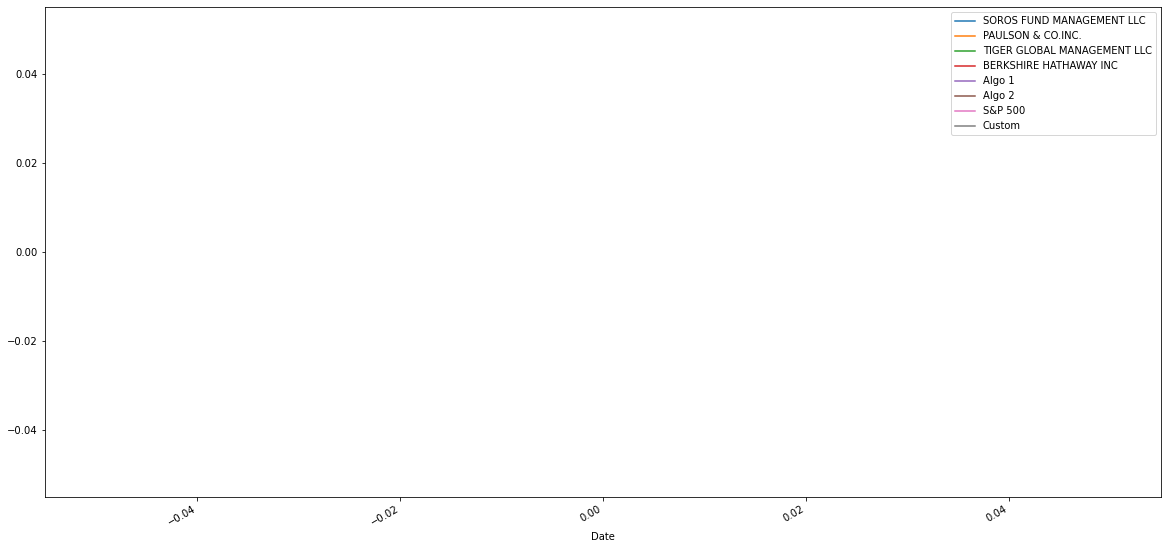

In [539]:
# Rolling
# YOUR CODE HERE
all_portfolios.rolling(window=21).std().plot(figsize=(20,10))

In [400]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_all = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_all

SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
S&P 500                       NaN
Custom                        NaN
dtype: float64

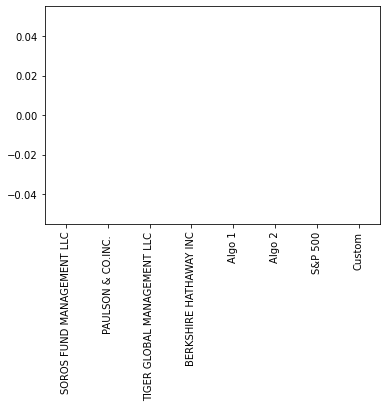

In [401]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_all.plot(kind= "bar")

In [402]:
# Create a correlation analysis
# YOUR CODE HERE
all_portfolios.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAULSON & CO.INC.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S&P 500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


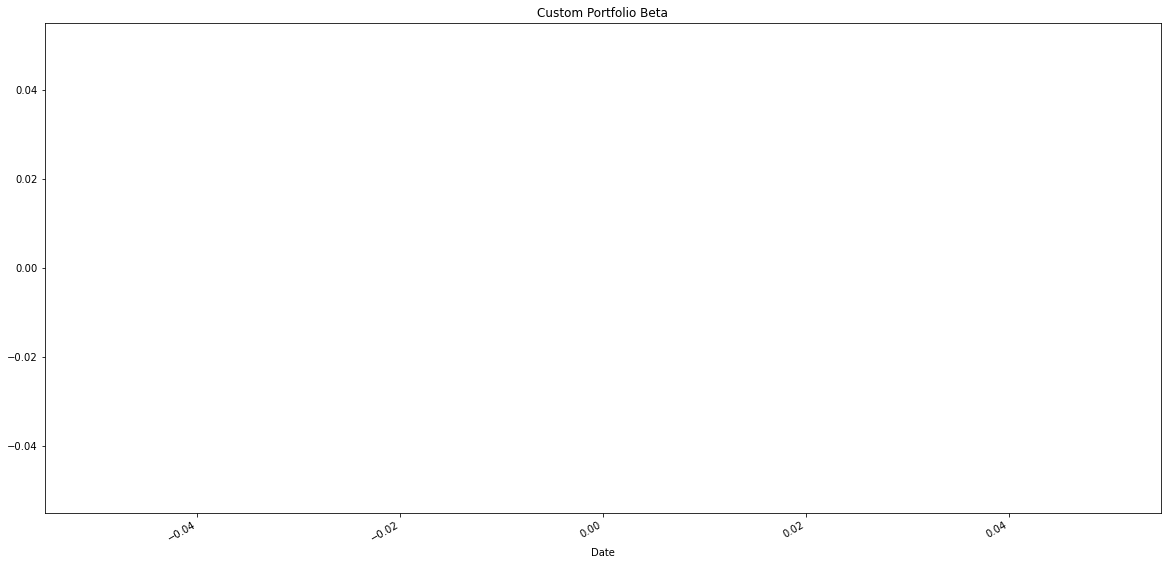

In [403]:
# Beta
# YOUR CODE HERE
covariance_all = all_portfolios['Custom'].cov(all_portfolios['S&P 500'])
covariance_all
variance_all = all_portfolios['S&P 500'].var()
rolling_covariance_all = all_portfolios['Custom'].rolling(window=60).cov(all_portfolios['S&P 500'])
rolling_variance_all = all_portfolios['S&P 500'].rolling(window=60).var()
rolling_beta_all = rolling_covariance_all / rolling_variance_all
rolling_beta_all.plot(figsize=(20, 10), title='Custom Portfolio Beta')